##### 데이터 2019, 2021년 데이터 6000으로 맞추기
* 2019, 2021 - 5000명 기준
* 2023 - 6000명 기준
* 출처 : 문화체육관광부 국민독서 실태조사

In [ ]:
import pandas as pd

standard = 6000
before_all_data = 5000

# 데이터 불러오기
df = pd.read_csv('data/연도별_도서_구입량.csv', index_col='구분')

# 2019, 2021 열만 선택해서 계산
selected_columns = [col for col in df.columns if '2019' in col or '2021' in col]
df_selected = df[selected_columns].apply(lambda x: x * standard / before_all_data).round(1)

# 2023 포함 나머지 열들 (계산 안 할 열들)
remaining_columns = [col for col in df.columns if col not in selected_columns]
df_remaining = df[remaining_columns]

# 계산된 값과 나머지 원본 열을 합치기
df_result = pd.concat([df_selected, df_remaining], axis=1)

# 열 순서 원래대로 정렬
df_result = df_result[df.columns]

# 결과 저장
df_result.to_csv('data/도서_구입량_result.csv')

##### 도서 차트화

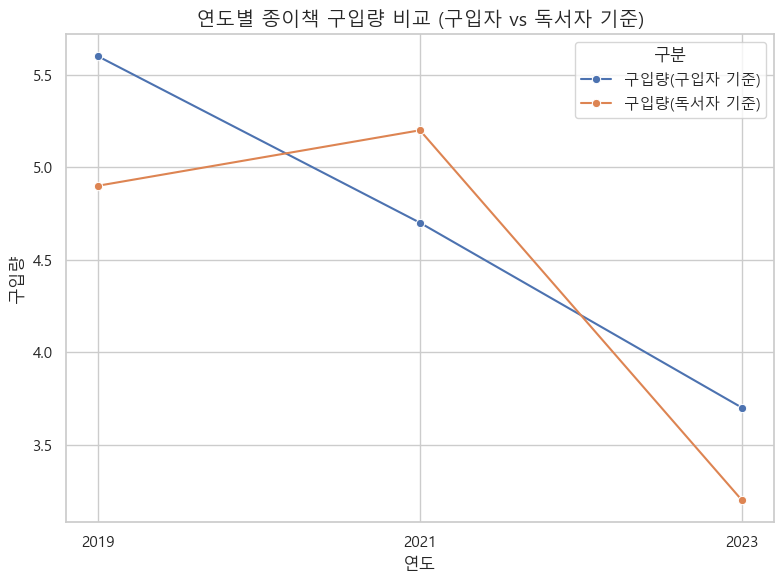

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우용
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기
df = pd.read_csv('data/연도별_도서_구입량.csv', index_col='구분')

# 종이책만 추출
df_filtered = df.loc[['구입자 기준', '독서자 구입량']]
paper_columns = [col for col in df.columns if '종이책' in col]
df_paper = df_filtered[paper_columns].reset_index()

# 긴 형태로 변환
df_melted = df_paper.melt(id_vars='구분', var_name='연도_형태', value_name='구입량')
df_melted['연도'] = df_melted['연도_형태'].str.extract(r'(\d{4})').astype(int)

# 그래프
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_melted, x='연도', y='구입량', hue='구분', marker='o')

plt.title('연도별 종이책 구입량 비교 (구입자 vs 독서자 기준)', fontsize=14)
plt.xlabel('연도')
plt.ylabel('구입량')
plt.xticks([2019, 2021, 2023])
plt.legend(title='구분')
plt.tight_layout()
plt.show()


C:\Users\yondu\AppData\Local\Temp\ipykernel_31816\3764464763.py:65: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yondu\AppData\Local\Temp\ipykernel_31816\3764464763.py:65: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yondu\AppData\Local\Temp\ipykernel_31816\3764464763.py:65: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yondu\AppData\Local\Temp\ipykernel_31816\3764464763.py:65: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\yondu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yondu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missi

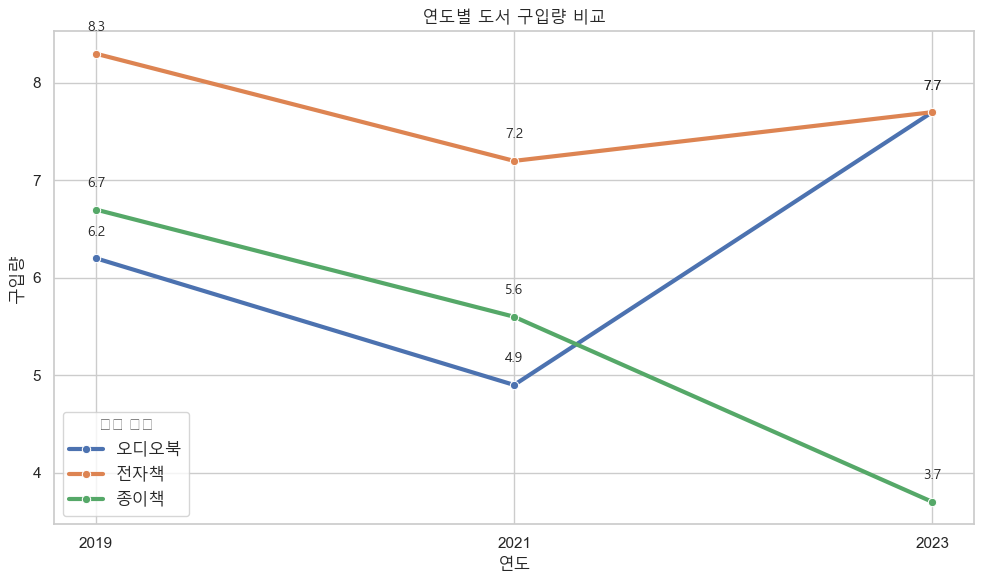

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 한글 폰트 설정 (윈도우용)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 'Malgun Gothic' 폰트 경로
font_prop = font_manager.FontProperties(fname=font_path)

# 데이터 불러오기
df = pd.read_csv('data/도서_구입량_result.csv', index_col='구분')

# '구입자 기준'만 선택
df_filtered = df.loc[['구입량(구입자 기준)']]

# 각 도서 형태별로 분리 (오디오북, 전자책, 종이책)
audio_columns = [col for col in df.columns if '오디오북' in col]
ebook_columns = [col for col in df.columns if '전자책' in col]
paper_columns = [col for col in df.columns if '종이책' in col]

# 오디오북, 전자책, 종이책 데이터 추출
df_audio = df_filtered[audio_columns].reset_index()
df_ebook = df_filtered[ebook_columns].reset_index()
df_paper = df_filtered[paper_columns].reset_index()

# 긴 형태로 변환
df_audio_melted = df_audio.melt(id_vars='구분', var_name='연도_형태', value_name='구입량')
df_ebook_melted = df_ebook.melt(id_vars='구분', var_name='연도_형태', value_name='구입량')
df_paper_melted = df_paper.melt(id_vars='구분', var_name='연도_형태', value_name='구입량')

# 연도 추출
df_audio_melted['연도'] = df_audio_melted['연도_형태'].str.extract(r'(\d{4})').astype(int)
df_ebook_melted['연도'] = df_ebook_melted['연도_형태'].str.extract(r'(\d{4})').astype(int)
df_paper_melted['연도'] = df_paper_melted['연도_형태'].str.extract(r'(\d{4})').astype(int)

# 시각화
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# 선 스타일 지정
line_width = 3

# 꺾은선 그래프
sns.lineplot(data=df_audio_melted, x='연도', y='구입량', label='오디오북', marker='o', linewidth=line_width)
sns.lineplot(data=df_ebook_melted, x='연도', y='구입량', label='전자책', marker='o', linewidth=line_width)
sns.lineplot(data=df_paper_melted, x='연도', y='구입량', label='종이책', marker='o', linewidth=line_width)

# 각 점에 수치 표시
def add_labels(df, label):
    for i in range(len(df)):
        x = df['연도'].iloc[i]
        y = df['구입량'].iloc[i]
        plt.text(x, y + 0.2, f'{y}', ha='center', va='bottom', fontsize=10, fontproperties=font_prop)

add_labels(df_audio_melted, '오디오북')
add_labels(df_ebook_melted, '전자책')
add_labels(df_paper_melted, '종이책')

# 그래프 제목 및 레이블
plt.title('연도별 도서 구입량 비교', fontsize=22, fontproperties=font_prop)
plt.xlabel('연도', fontproperties=font_prop)
plt.ylabel('구입량', fontproperties=font_prop)
plt.xticks([2019, 2021, 2023])
plt.legend(title='도서 형태', prop=font_prop)
plt.tight_layout()
plt.show()
